In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'The Complete Novel of Sherlock Holmes']
book1 = book1.drop(columns='title')
book1

,date,price
168,2019-01-24,263
169,2019-01-25,263
170,2019-01-26,263
171,2019-01-27,263
172,2019-01-28,263
173,2019-01-29,263
174,2019-01-30,263
175,2019-01-31,263
176,2019-02-01,263
177,2019-02-02,185


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [6]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(                 price
 date                  
 2019-01-24  263.000000
 2019-01-25  263.000000
 2019-01-26  263.000000
 2019-01-27  263.000000
 2019-01-28  263.000000
 2019-01-29  263.000000
 2019-01-30  263.000000
 2019-01-31  263.000000
 2019-02-01  263.000000
 2019-02-02  255.200000
 2019-02-03  248.818182
 2019-02-04  243.500000
 2019-02-05  239.000000
 2019-02-06  233.785714,                 price
 date                 
 2019-01-24        NaN
 2019-01-25   0.000000
 2019-01-26   0.000000
 2019-01-27   0.000000
 2019-01-28   0.000000
 2019-01-29   0.000000
 2019-01-30   0.000000
 2019-01-31   0.000000
 2019-02-01   0.000000
 2019-02-02  24.665766
 2019-02-03  31.552554
 2019-02-04  35.276827
 2019-02-05  37.469988
 2019-02-06  40.946830)

In [7]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [8]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                -0.999941
p-value                        0.753286
lags used                      4.000000
number of observations used    9.000000
Critical value (1%)           -4.473135
Critical value (5%)           -3.289881
Critical value (10%)          -2.772382
dtype: float64


In [9]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [10]:
#log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test
import numpy as np
indexed_book1_logscale = np.log(indexed_book1)

data = [go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)]
plot(data, filename='line-mode')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\line-mode.html'

In [11]:
# Moving Average with log timeseries

moving_avg = indexed_book1_logscale.rolling(window='14d').mean()
moving_std = indexed_book1_logscale.rolling(window='14d').std()
moving_avg, moving_std

(               price
 date                
 2019-01-24  5.572154
 2019-01-25  5.572154
 2019-01-26  5.572154
 2019-01-27  5.572154
 2019-01-28  5.572154
 2019-01-29  5.572154
 2019-01-30  5.572154
 2019-01-31  5.572154
 2019-02-01  5.572154
 2019-02-02  5.536974
 2019-02-03  5.508191
 2019-02-04  5.484204
 2019-02-05  5.463908
 2019-02-06  5.438771,                price
 date                
 2019-01-24       NaN
 2019-01-25  0.000000
 2019-01-26  0.000000
 2019-01-27  0.000000
 2019-01-28  0.000000
 2019-01-29  0.000000
 2019-01-30  0.000000
 2019-01-31  0.000000
 2019-02-01  0.000000
 2019-02-02  0.111248
 2019-02-03  0.142309
 2019-02-04  0.159107
 2019-02-05  0.168998
 2019-02-06  0.187643)

In [12]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [13]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1_logscale - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000
2019-01-25,0.000000
2019-01-26,0.000000
2019-01-27,0.000000
2019-01-28,0.000000
2019-01-29,0.000000
2019-01-30,0.000000
2019-01-31,0.000000
2019-02-01,0.000000


In [14]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [15]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.712137
p-value                        0.843581
lags used                      5.000000
number of observations used    8.000000
Critical value (1%)           -4.665186
Critical value (5%)           -3.367187
Critical value (10%)          -2.802961
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning:

invalid value encountered in true_divide



In [16]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1_logscale.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,5.572154
2019-01-25,5.572154
2019-01-26,5.572154
2019-01-27,5.572154
2019-01-28,5.572154
2019-01-29,5.572154
2019-01-30,5.572154
2019-01-31,5.572154
2019-02-01,5.572154


In [17]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [18]:
#Difference between log timeseries and weighted average

logminusWA = indexed_book1_logscale - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

               price
date                
2019-01-24  0.000000
2019-01-25  0.000000
2019-01-26  0.000000
2019-01-27  0.000000
2019-01-28  0.000000
2019-01-29  0.000000
2019-01-30  0.000000
2019-01-31  0.000000
2019-02-01  0.000000
2019-02-02 -0.117262
2019-02-03 -0.039087
2019-02-04 -0.013029
2019-02-05 -0.004343
2019-02-06 -0.037570


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [19]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                 -1.074205
p-value                         0.725248
lags used                       3.000000
number of observations used    10.000000
Critical value (1%)            -4.331573
Critical value (5%)            -3.232950
Critical value (10%)           -2.748700
dtype: float64


In [20]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [21]:
#Shifting the values

indexed_book1_logscale_diffshift = indexed_book1_logscale - indexed_book1_logscale.shift()

data = [go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [22]:
indexed_book1_logscale_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_logscale_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_logscale_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [23]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_logscale_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                 -2.002278
p-value                         0.285575
lags used                       2.000000
number of observations used    10.000000
Critical value (1%)            -4.331573
Critical value (5%)            -3.232950
Critical value (10%)           -2.748700
dtype: float64


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\stacked-subplots.html'

In [25]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [26]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_logscale_diffshift)
lag_pacf = pacf(indexed_book1_logscale_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning:

invalid value encountered in double_scalars



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [29]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting AR Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [30]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (0,1,0))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting MA Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [31]:
#AR Model is better as it has less RSS value than MA Model

In [32]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25   -0.036318
2019-01-26   -0.040522
2019-01-27   -0.045968
2019-01-28   -0.053209
2019-01-29   -0.053209
2019-01-30   -0.053209
2019-01-31   -0.053209
2019-02-01   -0.053209
2019-02-02   -0.053209
2019-02-03    0.000436
2019-02-04    0.001356
2019-02-05    0.002200
2019-02-06   -0.053209
dtype: float64
date
2019-01-25   -0.036318
2019-01-26   -0.076839
2019-01-27   -0.122808
2019-01-28   -0.176016
2019-01-29   -0.229225
2019-01-30   -0.282433
2019-01-31   -0.335642
2019-02-01   -0.388851
2019-02-02   -0.442059
2019-02-03   -0.441624
2019-02-04   -0.440268
2019-02-05   -0.438068
2019-02-06   -0.491276
dtype: float64


In [33]:
prediction_log = pd.Series(indexed_book1_logscale.price.ix[0], index = indexed_book1_logscale.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    5.572154
2019-01-25    5.535836
2019-01-26    5.495315
2019-01-27    5.449346
2019-01-28    5.396138
2019-01-29    5.342929
2019-01-30    5.289721
2019-01-31    5.236512
2019-02-01    5.183303
2019-02-02    5.130095
2019-02-03    5.130531
2019-02-04    5.131886
2019-02-05    5.134086
2019-02-06    5.080878
dtype: float64

In [34]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [35]:
indexed_book1_logscale

,price
date,
2019-01-24,5.572154
2019-01-25,5.572154
2019-01-26,5.572154
2019-01-27,5.572154
2019-01-28,5.572154
2019-01-29,5.572154
2019-01-30,5.572154
2019-01-31,5.572154
2019-02-01,5.572154


(array([5.07530378, 5.04449702, 5.01874385, 4.98001821, 4.94156119,
        4.90427932, 4.86881976]),
 array([0.09250367, 0.12125678, 0.1381516 , 0.14895001, 0.16110793,
        0.17338348, 0.18497125]),
 array([[4.89399992, 5.25660764],
        [4.80683809, 5.28215594],
        [4.74797169, 5.28951602],
        [4.68808156, 5.27195486],
        [4.62579546, 5.25732693],
        [4.56445394, 5.2441047 ],
        [4.50628276, 5.23135676]]))

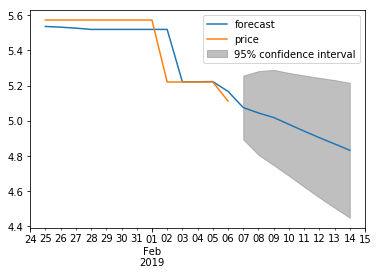

In [37]:
forecast = results_AR.forecast(steps=7)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=7)